In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('results/processed.tsv', sep='\t')
df

,go_term_ids,name,cutoff,closure,top_n,source,model,method,method_desc,run,...,true_positive_terms,false_positive_terms,false_negative_terms_example20,unparsed_terms,gene_set_size,precision,recall,recall_general,recall_specific,f1_score
0,"{'BFO:0000015', 'GO:0032787', 'GO:0043436', 'G...",glycolysis-gocam-0-0.005,0.005,False,1,NONE,4.0,gpt,no_synopsis-4,gpt-4.no_synopsis.v1,...,GO:0006096,NaN,NaN,NaN,10,1.000000,1.000000,1.00,1.000000,1.000000
1,"{'BFO:0000015', 'GO:0032787', 'GO:0043436', 'G...",glycolysis-gocam-0-0.005,0.005,False,5,NONE,4.0,gpt,no_synopsis-4,gpt-4.no_synopsis.v1,...,GO:0006096,GO:0006006,GO:0006090|GO:001605,energy production|atp generation,10,0.500000,0.200000,1.00,0.200000,0.285714
2,"{'BFO:0000015', 'GO:0032787', 'GO:0043436', 'G...",glycolysis-gocam-0-0.005,0.005,False,10,NONE,4.0,gpt,no_synopsis-4,gpt-4.no_synopsis.v1,...,GO:0006096,GO:0006006,GO:0006090|GO:001605,energy production|atp generation,10,0.500000,0.100000,0.20,0.200000,0.166667
3,"{'BFO:0000015', 'GO:0032787', 'GO:0043436', 'G...",glycolysis-gocam-0-0.005,0.005,False,25,NONE,4.0,gpt,no_synopsis-4,gpt-4.no_synopsis.v1,...,GO:0006096|GO:0006006,NaN,GO:0006090|GO:001605,energy production|atp generation,10,1.000000,0.080000,0.25,0.153846,0.148148
4,"{'BFO:0000015', 'GO:0032787', 'GO:0043436', 'G...",glycolysis-gocam-0-0.005,0.005,False,5000,NONE,4.0,gpt,no_synopsis-4,gpt-4.no_synopsis.v1,...,GO:0006096|GO:0006006,NaN,GO:0006090|GO:001605,energy production|atp generation,10,1.000000,0.051282,0.25,0.142857,0.097561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99355,"{'GO:0051348', 'GO:0005976', 'GO:0035524', 'GO...",HALLMARK_MTORC1_SIGNALING-1-99,99.000,True,1,NaN,NaN,NaN,NaN,closure,...,GO:0044283,NaN,NaN,NaN,180,1.000000,1.000000,1.00,1.000000,1.000000
99356,"{'GO:0051348', 'GO:0005976', 'GO:0035524', 'GO...",HALLMARK_MTORC1_SIGNALING-1-99,99.000,True,5,NaN,NaN,NaN,NaN,closure,...,GO:0044283|GO:0005737|GO:0019752|GO:0036094|GO...,GO:0008525|GO:0009749|GO:0019899|GO:0050709|GO...,NaN,NaN,180,0.000794,1.000000,1.00,1.000000,0.001587
99357,"{'GO:0051348', 'GO:0005976', 'GO:0035524', 'GO...",HALLMARK_MTORC1_SIGNALING-1-99,99.000,True,10,NaN,NaN,NaN,NaN,closure,...,GO:0044283|GO:0005737|GO:0019752|GO:0036094|GO...,GO:0008525|GO:0009749|GO:0019899|GO:0050709|GO...,NaN,NaN,180,0.001720,1.000000,1.00,1.000000,0.003434
99358,"{'GO:0051348', 'GO:0005976', 'GO:0035524', 'GO...",HALLMARK_MTORC1_SIGNALING-1-99,99.000,True,25,NaN,NaN,NaN,NaN,closure,...,GO:0044283|GO:0005737|GO:0019752|GO:0036094|GO...,GO:0008525|GO:0019899|GO:0050709|GO:0035094|GO...,NaN,NaN,180,0.004761,1.000000,1.00,1.000000,0.009477


In [3]:
df['has_hit'] = 0
df.loc[df['true_positives'] > 0, 'has_hit'] = 1

In [4]:
df["model"] = df["model"].apply(lambda x: f"GPT-{x}" if not str(x).startswith("GPT") else x)


In [5]:
cmap = {True: "closure", False: "no_closure"}
df["closure"] = df["closure"].apply(lambda x: cmap.get(x, x))

In [6]:
df["closure"].unique()

array(['no_closure', 'closure'], dtype=object)

In [7]:
df["model"].unique()

array(['GPT-4.0', 'GPT-3.5', 'GPT-3.0', 'GPT-nan'], dtype=object)

In [8]:
df_tophit = df.query("top_n == 1 and method=='gpt'")

In [9]:
len(df_tophit.query("true_positives == 0"))

11410

In [10]:
len(df_tophit.query("true_positives > 0"))

4142

In [11]:
df["cutoff"].unique()

array([5.0e-03, 5.0e-02, 9.9e+01])

In [12]:
#df_tophit.df_tophit[df_tophit['true_positives'] > 0, 'has_top_term'] = 1


In [13]:
df_tophit.groupby(["source", "model"]).mean("has_hit").reset_index()[["source", "model", "has_hit"]]

,source,model,has_hit
0,GO,GPT-3.0,0.194444
1,GO,GPT-3.5,0.272569
2,GO,GPT-4.0,0.371528
3,NONE,GPT-3.0,0.144097
4,NONE,GPT-3.5,0.364583
5,NONE,GPT-4.0,0.316551
6,RefSeq,GPT-3.0,0.178819
7,RefSeq,GPT-3.5,0.288194
8,RefSeq,GPT-4.0,0.266204


In [14]:
df.query("top_n==10 and cutoff==0.05 and closure=='closure'").groupby(["source", "model"]).\
mean("has_hit").reset_index()[["source", "model", "has_hit"]]

,source,model,has_hit
0,GO,GPT-3.0,0.614583
1,GO,GPT-3.5,0.697917
2,GO,GPT-4.0,0.864583
3,NONE,GPT-3.0,0.559028
4,NONE,GPT-3.5,0.812500
5,NONE,GPT-4.0,0.798611
6,RefSeq,GPT-3.0,0.517361
7,RefSeq,GPT-3.5,0.739583
8,RefSeq,GPT-4.0,0.756944


In [15]:
import numpy as np

def himax(tbl: pd.DataFrame, by=["model", "source"], ascending=True):
    """
    Prepare a table for publication, highlighting maximum values
    """
    tbl_subset = tbl.select_dtypes(include=[np.number]).columns
    return tbl.sort_values(by=by, ascending=ascending).style.hide().highlight_max(subset=tbl_subset, axis=0, props='font-weight:bold').format(precision=3)


In [16]:
def has_hit_summary(top_n=10, cutoff=0.05, closure='closure'):
    df_subset = df.query(f"top_n=={top_n} and cutoff=={cutoff} and closure=='{closure}'")
    grp = df_subset.groupby(["source", "model"])
    return grp.mean("has_hit").reset_index()[["source", "model", "has_hit"]]
    

In [17]:
himax(has_hit_summary(10, 0.05, 'closure'))

source,model,has_hit
GO,GPT-3.0,0.615
NONE,GPT-3.0,0.559
RefSeq,GPT-3.0,0.517
GO,GPT-3.5,0.698
NONE,GPT-3.5,0.812
RefSeq,GPT-3.5,0.740
GO,GPT-4.0,0.865
NONE,GPT-4.0,0.799
RefSeq,GPT-4.0,0.757


In [18]:
himax(has_hit_summary(10, 0.05, 'no_closure'))

source,model,has_hit
GO,GPT-3.0,0.260
NONE,GPT-3.0,0.222
RefSeq,GPT-3.0,0.260
GO,GPT-3.5,0.410
NONE,GPT-3.5,0.535
RefSeq,GPT-3.5,0.462
GO,GPT-4.0,0.583
NONE,GPT-4.0,0.503
RefSeq,GPT-4.0,0.399


In [19]:
himax(has_hit_summary(1, 0.05, 'closure'), by=["has_hit"], ascending=False)

source,model,has_hit
GO,GPT-4.0,0.580
NONE,GPT-3.5,0.531
NONE,GPT-4.0,0.493
RefSeq,GPT-3.5,0.431
RefSeq,GPT-4.0,0.420
GO,GPT-3.5,0.392
GO,GPT-3.0,0.292
RefSeq,GPT-3.0,0.267
NONE,GPT-3.0,0.212


In [20]:
himax(has_hit_summary(1, 0.05, 'no_closure'), by=["has_hit"], ascending=False)

source,model,has_hit
NONE,GPT-3.5,0.198
GO,GPT-4.0,0.163
GO,GPT-3.5,0.153
RefSeq,GPT-3.5,0.146
NONE,GPT-4.0,0.139
RefSeq,GPT-4.0,0.111
GO,GPT-3.0,0.097
RefSeq,GPT-3.0,0.090
NONE,GPT-3.0,0.076


In [21]:
def pivot_tbl(tbl, cols=['closure', 'top_n', 'cutoff'], metric='has_hit', query={}) -> pd.DataFrame:
    filtered = tbl.copy()
    if query:
        for k, v in query.items():
            if isinstance(v, list):
                filtered = filtered[filtered[k].isin(v)]
            else:
                filtered = filtered[filtered[k] == v]
    pivoted = filtered.pivot_table(index=['source', 'model'], columns=cols , values=metric, aggfunc='mean').\
    reset_index()
    return himax(pivoted)

pivot_tbl(df, cols=['closure', 'top_n'], query={"cutoff": 0.05, "top_n": [1, 5, 10, 25]})

In [22]:
#pivot_tbl(df, cols=['top_n'], query={"cutoff": 0.05, "top_n": [1], "closure": "closure"}).sort_values(by=1)

In [23]:
# megapivot
pivot_tbl(df)

In [24]:
df.query("top_n == 1")["cutoff"].unique()

array([5.0e-03, 5.0e-02, 9.9e+01])

In [25]:
df.query("top_n == 1 and closure=='closure' and cutoff==99.0").groupby(["model", "source", "cutoff"]).mean("has_hit").\
 reset_index()[["source", "model", "cutoff", "has_hit"]]

,source,model,cutoff,has_hit
0,GO,GPT-3.0,99.0,0.291667
1,NONE,GPT-3.0,99.0,0.211806
2,RefSeq,GPT-3.0,99.0,0.267361
3,GO,GPT-3.5,99.0,0.392361
4,NONE,GPT-3.5,99.0,0.531250
5,RefSeq,GPT-3.5,99.0,0.430556
6,GO,GPT-4.0,99.0,0.579861
7,NONE,GPT-4.0,99.0,0.496528
8,RefSeq,GPT-4.0,99.0,0.423611


In [26]:
pivot_tbl(df, metric='precision')

In [27]:
pivot_tbl(df, metric='recall')

In [28]:
pivot_tbl(df, metric='f1_score')

In [33]:
def outcomes_summary(top_n=10, cutoff=0.05, closure='closure', metrics=["precision", "recall", "f1_score", "has_hit"]):
    df_subset = df.query(f"top_n=={top_n} and cutoff=={cutoff} and closure=='{closure}'")
    grp = df_subset.groupby(["source", "model"])
    return grp.mean(metrics).reset_index()[["source", "model"] + metrics]
                                           
himax(outcomes_summary())                                           

source,model,precision,recall,f1_score,has_hit
GO,GPT-3.0,0.252,0.200,0.208,0.615
NONE,GPT-3.0,0.339,0.171,0.211,0.559
RefSeq,GPT-3.0,0.261,0.172,0.196,0.517
GO,GPT-3.5,0.467,0.265,0.318,0.698
NONE,GPT-3.5,0.543,0.371,0.420,0.812
RefSeq,GPT-3.5,0.517,0.310,0.368,0.740
GO,GPT-4.0,0.486,0.374,0.408,0.865
NONE,GPT-4.0,0.507,0.336,0.386,0.799
RefSeq,GPT-4.0,0.471,0.304,0.354,0.757


In [50]:
metrics = ["precision", "recall", "f1_score", "has_hit"]
grp = df.query("model != 'GPT-nan'").groupby(["model"])
himax(grp.mean(metrics).reset_index()[["model"] + metrics], by=["model"])

model,precision,recall,f1_score,has_hit
GPT-3.0,0.263,0.108,0.121,0.438
GPT-3.5,0.423,0.188,0.216,0.598
GPT-4.0,0.414,0.198,0.223,0.640


In [35]:
himax(outcomes_summary(cutoff=0.005))

source,model,precision,recall,f1_score,has_hit
GO,GPT-3.0,0.247,0.206,0.205,0.615
NONE,GPT-3.0,0.323,0.167,0.203,0.531
RefSeq,GPT-3.0,0.256,0.172,0.194,0.507
GO,GPT-3.5,0.459,0.271,0.317,0.691
NONE,GPT-3.5,0.535,0.375,0.418,0.795
RefSeq,GPT-3.5,0.500,0.312,0.365,0.715
GO,GPT-4.0,0.473,0.376,0.401,0.847
NONE,GPT-4.0,0.493,0.338,0.382,0.781
RefSeq,GPT-4.0,0.454,0.299,0.344,0.729


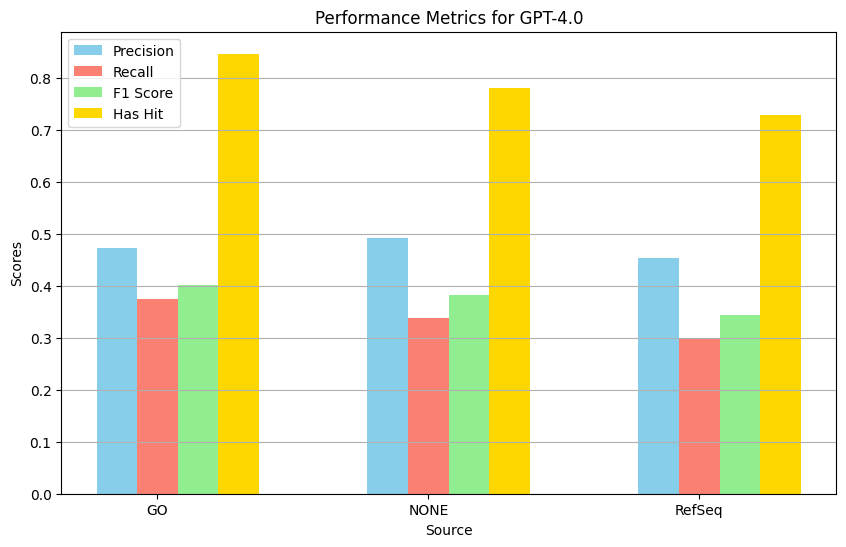

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_model_performance_separated(data, model_filter, name):
    """
    Function to plot the performance metrics (precision, recall, f1_score) for a specific model.
    Each metric is grouped separately for clarity.

    :param data: DataFrame containing the performance data.
    :param model_filter: The specific model to filter the data.
    """
    # Filtering the data for the specified model
    filtered_data = data[data['model'] == model_filter]

    # Setting up the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Defining bar width and positions
    bar_width = 0.15
    r1 = range(len(filtered_data))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    r4 = [x + bar_width for x in r3]

    # Plotting each metric in a separate group
    ax.bar(r1, filtered_data['precision'], width=bar_width, color='skyblue', label='Precision')
    ax.bar(r2, filtered_data['recall'], width=bar_width, color='salmon', label='Recall')
    ax.bar(r3, filtered_data['f1_score'], width=bar_width, color='lightgreen', label='F1 Score')
    ax.bar(r4, filtered_data['has_hit'], width=bar_width, color='gold', label='Has Hit')


    # Adding labels and title
    ax.set_xlabel('Source')
    ax.set_ylabel('Scores')
    ax.set_title(f'Performance Metrics for {model_filter}')
    ax.set_xticks([r + bar_width for r in range(len(filtered_data))])
    ax.set_xticklabels(filtered_data['source'])
    ax.legend()
    ax.grid(axis="y")
    plt.savefig(f"output/performance-{name}.png")
    plt.show()

# Assuming 'df' is the DataFrame containing your data
plot_model_performance_separated(outcomes_summary(cutoff=0.005), 'GPT-4.0', 'gpt-4-0_005')


In [ ]:
#df_filtered = df.query("cutoff == 0.05 and top_n.isin([1, 5, 10, 25])")
df_filtered = df
pivoted = df_filtered.pivot_table(index=['source', 'model'], columns=['closure', 'top_n', 'cutoff'] , values='has_hit', aggfunc='mean').reset_index()
himax(pivoted)

In [ ]:
pivoted = df_filtered.pivot_table(index=['source', 'model'], columns=['closure', 'top_n'] , values='recall', aggfunc='mean').reset_index()
himax(pivoted)